In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.datasets import fashion_mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
train_labels[0]

9

In [7]:
train_labels[100]

8

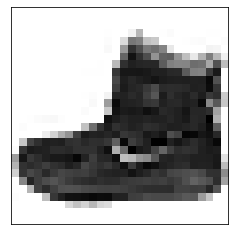

In [8]:
plt.imshow(train_images[0],cmap='gray_r')
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
train_labels[0]

9

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [12]:
class_names[0]

'T-shirt/top'

In [13]:
class_names[train_labels[0]]

'Ankle boot'

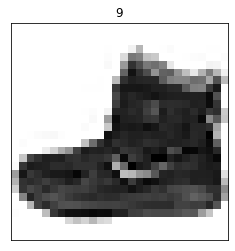

In [14]:
plt.imshow(train_images[0],cmap='gray_r')
plt.title(train_labels[0])
plt.xticks([])
plt.yticks([])
plt.show()

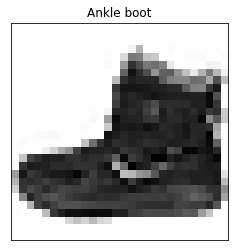

In [15]:
plt.imshow(train_images[0],cmap='gray_r')
plt.title(class_names[train_labels[0]])
plt.xticks([])
plt.yticks([])
plt.show()

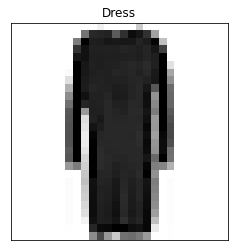

In [16]:
plt.imshow(train_images[25],cmap='gray_r')
plt.title(class_names[train_labels[25]])
plt.xticks([])
plt.yticks([])
plt.show()

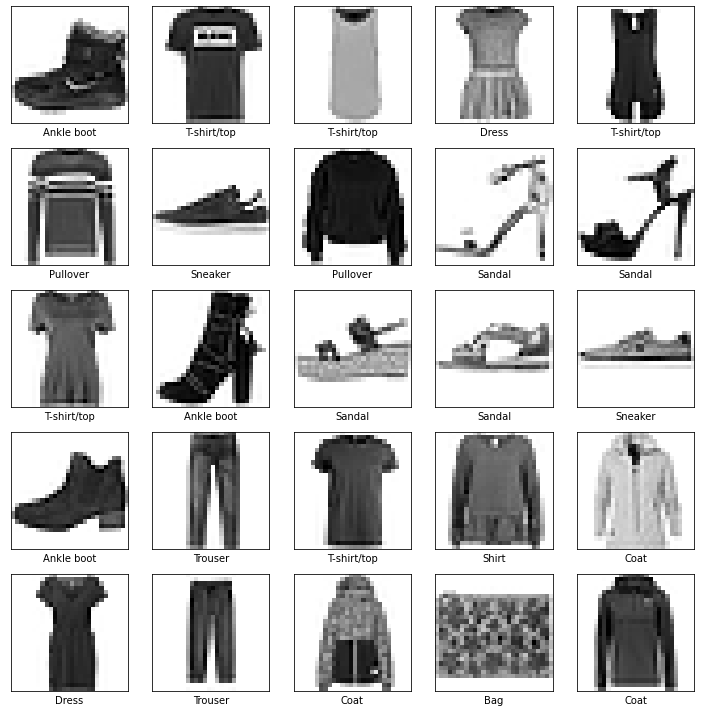

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.show()

In [18]:
#CNN
# (number_of_images,width,height,channel)
#For B/W image, channel=1

In [19]:
train_images.shape

(60000, 28, 28)

In [20]:
train_images.shape[0]

60000

In [21]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)

In [22]:
train_images.shape

(60000, 28, 28, 1)

In [23]:
test_images.shape

(10000, 28, 28)

In [24]:
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [25]:
train_images[0].shape

(28, 28, 1)

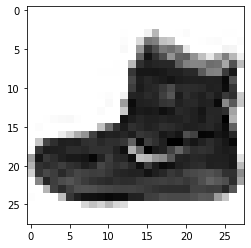

In [26]:
plt.imshow(train_images[0],cmap='gray_r')
plt.show()

In [27]:
#casting

In [28]:
train_images = train_images.astype('float32')

In [29]:
test_images = test_images.astype('float32')

In [30]:
train_images[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [31]:
#CNN
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) 
model.add(layers.MaxPool2D(2,2)) 
model.add(layers.Conv2D(64,(3,3),activation='relu')) 
model.add(layers.MaxPool2D(2,2))  
model.add(layers.Conv2D(64,(3,3),activation='relu')) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu')) #64 is the hidden layer neurons as in regular Deep Neural Network
model.add(layers.Dense(10,activation='softmax')) #10 is the number of output neurons based on classes
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
history = model.fit(train_images,train_labels,epochs=10,batch_size=20,validation_split=0.2)

Epoch 1/10
2400/2400 [==============================] - 44s 18ms/step - loss: 0.5933 - accuracy: 0.8105 - val_loss: 0.4082 - val_accuracy: 0.8549
Epoch 2/10
2400/2400 [==============================] - 42s 17ms/step - loss: 0.3577 - accuracy: 0.8700 - val_loss: 0.3351 - val_accuracy: 0.8813
Epoch 3/10
2400/2400 [==============================] - 43s 18ms/step - loss: 0.3216 - accuracy: 0.8825 - val_loss: 0.3340 - val_accuracy: 0.8834
Epoch 4/10
2400/2400 [==============================] - 41s 17ms/step - loss: 0.2902 - accuracy: 0.8929 - val_loss: 0.3275 - val_accuracy: 0.8857
Epoch 5/10
2400/2400 [==============================] - 45s 19ms/step - loss: 0.2721 - accuracy: 0.8990 - val_loss: 0.3281 - val_accuracy: 0.8811
Epoch 6/10
2400/2400 [==============================] - 42s 17ms/step - loss: 0.2540 - accuracy: 0.9051 - val_loss: 0.3118 - val_accuracy: 0.8911
Epoch 7/10
2400/2400 [==============================] - 45s 19ms/step - loss: 0.2415 - accuracy: 0.9121 - val_loss: 0.3377 -

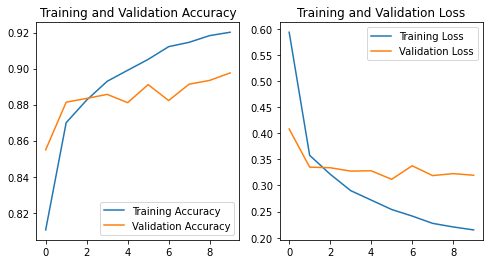

In [35]:
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc=0)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.show()

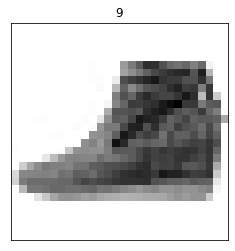

In [37]:
plt.imshow(test_images[250],cmap='gray_r')
plt.title(test_labels[250])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [38]:
model.predict(test_images[250].reshape(1,28,28,1))

array([[1.3884983e-13, 8.8462163e-12, 8.8826578e-11, 3.2739948e-13,
        3.2375361e-10, 2.3466631e-04, 4.1758966e-10, 1.1670658e-02,
        5.8729985e-13, 9.8809475e-01]], dtype=float32)

In [39]:
model.predict(test_images[250].reshape(1,28,28,1)).round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.012, 0.   ,
        0.988]], dtype=float32)

In [41]:
np.argmax(model.predict(test_images[250].reshape(1,28,28,1)))

9